# Network Notes

In [293]:
# good 160 unit *3 network
network_model = "func-27-1-13"
iter1 = 2000
iter2 = 16000
codec = 3200
model_type = 'functional'

output_fn_postfix1 = "output_" + str(0) + "_" + str(iter1)
output_fn_postfix1_mid = "output_" + str(1) + "_" + str(iter1)

output_fn_postfix2 = "output_" + str(0) + "_" + str(iter2)
output_fn_postfix2_mid = "output_" + str(1) + "_" + str(iter2)


from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



Training Iteration 3624 
using full set of frames 
generating encoded output 
Training Iteration 3625 
using full set of frames 
generating encoded output 
Training Iteration 3626 
using full set of frames 
generating encoded output 
Training Iteration 3627 
using full set of frames 
generating encoded output 

 775/1221 [==================>...........] - ETA: 4s - loss: 0.6154 - model_2_loss_1: 2.2266 - model_2_loss_2: 1.0734 - generator_TD_Dense_0_loss: 0.1179 - model_1_loss: 0.2858'


In [294]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  3620
num_iterations :  15000
fit_batch_size :  5
learn_next_step :  False
gen_every_nth :  10
generate_num_outputs :  2
save_model_every_nth :  10
framelen :  13
frame_seq_len :  100
overlap_sequence :  1
seed_seq_len :  100
seed_start_index :  60
seq_step :  98
test_data_fn :  ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200
frame_prop_orig_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
frame_prop_loss_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'Nadam', 'params': {}}
generate_len :  200
model_filename :  out/func-27-1-13/model-3620.h5
frame_len_ms :  20


In [295]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-27-1-13 Notes

2017-12-19 18:51:20

Run with arguments ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200 

## Description

User Lambda layers to split out the input to decoder,
to more correctly handle the feed between encoder and
decoder


In [296]:
if model_type != 'functional':
  nd.model_config(network_model)

Columns: ['generator_TD_Dense_0_loss', 'model_2_loss_2', 'loss']


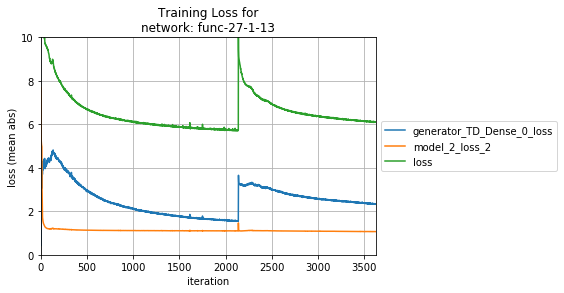

In [297]:
nd.plot_training_loss(network_model, 'mean abs', columns=['generator_TD_Dense_0_loss', 'model_2_loss_2', 'loss'], weights=[20,1,10], start_index=0, y_max=10) 

In [298]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    rl = f.readlines()
    print(str.join("",rl[0:1]))
    print(str.join("",rl[-10:]))
    

with open(home + "/store/c2gen/out/"+network_model+"/gen_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

epoch,generator_TD_Dense_0_loss,loss,model_1_loss,model_2_loss_1,model_2_loss_2

0,0.116735823581,0.609558717924,0.286135914858,2.19672562302,1.06614880795
0,0.117079373208,0.609004081463,0.286620342382,2.18673055882,1.06694460906
0,0.116740990732,0.611386363129,0.28550629474,2.20082789767,1.07086319978
0,0.115983359223,0.609582713169,0.285838902338,2.19812104702,1.06726857992
0,0.116542985158,0.610426419732,0.285497608632,2.20320613273,1.06726665478
0,0.117194530846,0.611457685517,0.286214848469,2.20860984607,1.0675998776
0,0.117505345606,0.611396107681,0.286667126842,2.20743125456,1.06716585242
0,0.116972477867,0.610243360146,0.285579324257,2.20304,1.0658528489
0,0.116494089896,0.610449075979,0.285468400916,2.20150211473,1.06800797246
0,0.116683774355,0.610248425506,0.285688840042,2.20072567252,1.06721858112

3620


Latest Iteration: 3620
3200 rate codec



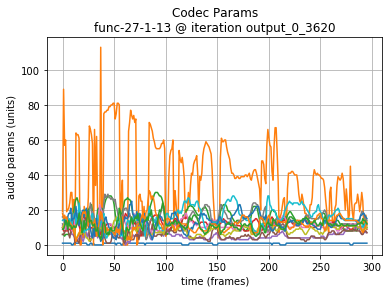

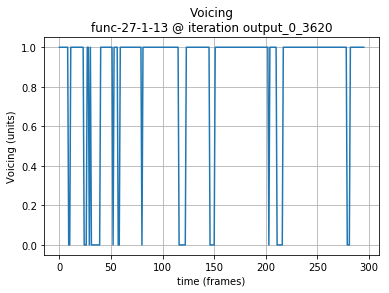

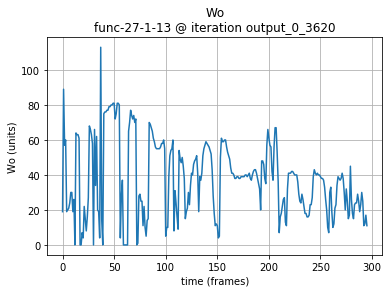

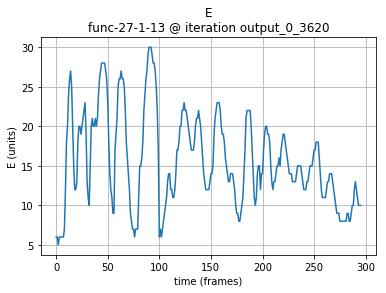

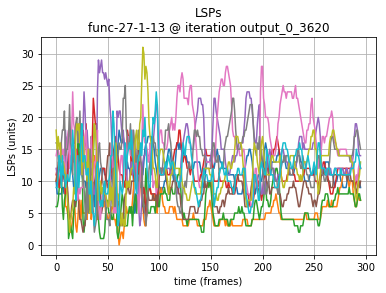

In [299]:
try:
  print("Latest Iteration:", latest_iter)
  
  output_fn_postfix = "output_" + str(0) + "_" + str(latest_iter)
  output_fn_postfix_mid = "output_" + str(1) + "_" + str(latest_iter)
  
  chart_postfix = output_fn_postfix

  nd.plot_codec_params(network_model,chart_postfix, scale_up='orig')
  nd.plot_spec_params(network_model,chart_postfix, params='Voicing')
  nd.plot_spec_params(network_model,chart_postfix, params='Wo')
  nd.plot_spec_params(network_model,chart_postfix, params='E')
  nd.plot_spec_params(network_model,chart_postfix, params='LSPs')
except FileNotFoundError:
    print("File not found")

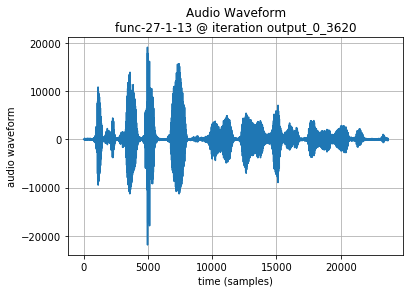

In [300]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

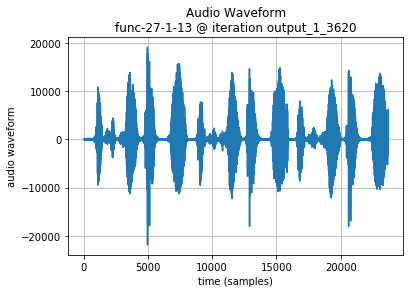

In [301]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix_mid)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

Early Iterations
===

output_0_2000
3200 rate codec



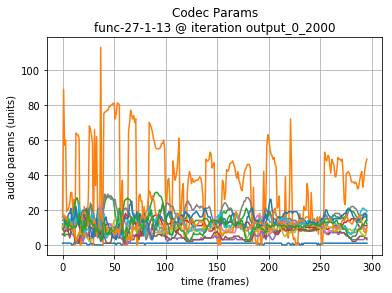

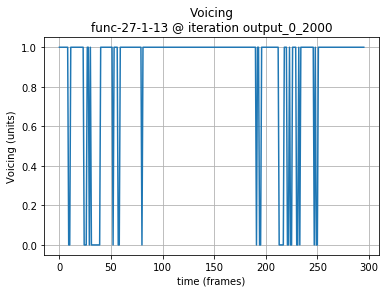

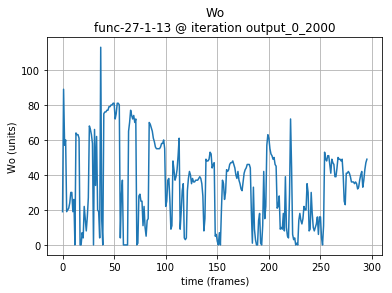

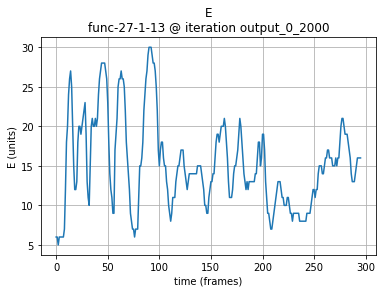

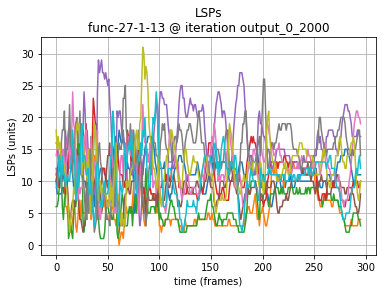

In [302]:
print(output_fn_postfix1)
nd.plot_codec_params(network_model,output_fn_postfix1, scale_up='orig')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix1, params='E')
nd.plot_spec_params(network_model,output_fn_postfix1, params='LSPs')

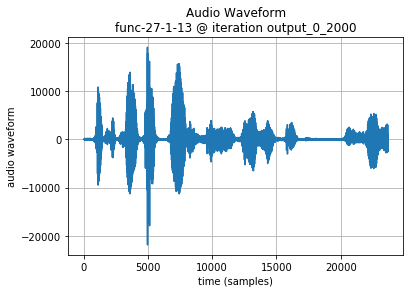

In [303]:
nd.plot_audio_waveform(network_model, output_fn_postfix1)

Listen to the WAV file

In [304]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)+codec_sub+".wav"))

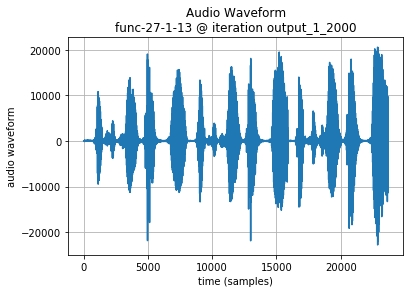

In [305]:
nd.plot_audio_waveform(network_model, output_fn_postfix1_mid)

In [306]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)+codec_sub+".wav"))

Later Iterations
===

In [307]:
nd.plot_codec_params(network_model,output_fn_postfix2, scale_up=True)
nd.plot_spec_params(network_model,output_fn_postfix2, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix2, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix2, params='E')
nd.plot_spec_params(network_model,output_fn_postfix2, params='LSPs')

FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/func-27-1-13/out-c2cb-output_0_16000'

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix2)+codec_sub+".wav"))

## 